In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [53]:
water_df = pd.read_csv('/Users/thomaskiddoo/Library/CloudStorage/OneDrive-GettysburgCollege/DS 325/Dataset/Country-Wise Data/Canada_dataset.csv')
water_df.head()

,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
0,Canada,SE649035-145565,River,12-01-1974,0.059248,1.30,8.1500,0.011917,8.07500,9.885,0.343917,11.73155,100.0,Excellent
1,Canada,SE649035-145565,River,12-01-1975,0.039821,1.38,7.8000,0.009417,7.73333,10.150,0.449083,11.82009,100.0,Excellent
2,Canada,SE649035-145565,River,12-01-1976,0.031341,2.23,7.8000,0.011000,7.46667,10.235,0.220750,14.87472,100.0,Excellent
3,Canada,SE649035-145565,River,12-01-1977,0.020501,1.61,8.1500,0.012333,7.78333,11.116,0.572250,15.89293,100.0,Excellent
4,Canada,SE649035-145565,River,12-01-1978,0.020023,1.64,4.3708,0.006182,7.10000,7.068,0.371091,15.22888,100.0,Excellent


In [54]:
water_df = water_df.drop(columns=['Country', 'Area', 'Waterbody Type', 'Date'])
water_df.head()

,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
0,0.059248,1.30,8.1500,0.011917,8.07500,9.885,0.343917,11.73155,100.0,Excellent
1,0.039821,1.38,7.8000,0.009417,7.73333,10.150,0.449083,11.82009,100.0,Excellent
2,0.031341,2.23,7.8000,0.011000,7.46667,10.235,0.220750,14.87472,100.0,Excellent
3,0.020501,1.61,8.1500,0.012333,7.78333,11.116,0.572250,15.89293,100.0,Excellent
4,0.020023,1.64,4.3708,0.006182,7.10000,7.068,0.371091,15.22888,100.0,Excellent


In [ ]:
#WQI = ['Poor', 'Marginal', 'Fair', 'Good', 'Excellent']
WQI = ['Excellent', 'Good', 'Fair', 'Marginal', 'Poor']  # Reordered for ordinal encoding
ord_features = ['CCME_WQI']
ordEnc = OrdinalEncoder(categories = [WQI])

#cat_features = ['student_major']
#oneHotEnc = OneHotEncoder()


coltrans = ColumnTransformer(
    transformers=[
        ("ord", ordEnc, ord_features),   # (nickname, transformer object variable, which columns to apply to)
        #("onehot", oneHotEnc, cat_features)
        ],
    remainder = 'passthrough',
    verbose_feature_names_out=False)

X_trans = coltrans.fit_transform(water_df)
X_trans

array([[0.00000000e+00, 5.92480000e-02, 1.30000000e+00, ...,
        3.43917000e-01, 1.17315500e+01, 1.00000000e+02],
       [0.00000000e+00, 3.98207100e-02, 1.38000000e+00, ...,
        4.49083000e-01, 1.18200900e+01, 1.00000000e+02],
       [0.00000000e+00, 3.13412900e-02, 2.23000000e+00, ...,
        2.20750000e-01, 1.48747200e+01, 1.00000000e+02],
       ...,
       [1.00000000e+00, 1.93200000e-02, 1.27500000e+00, ...,
        5.85000000e-02, 1.21742500e+00, 9.31955895e+01],
       [0.00000000e+00, 2.30474720e-01, 2.00000000e+00, ...,
        5.85000000e-02, 1.42071284e+01, 1.00000000e+02],
       [0.00000000e+00, 2.29066667e-01, 5.00000000e+00, ...,
        5.85000000e-02, 1.96266667e-01, 1.00000000e+02]])

In [56]:
feature_names = coltrans.get_feature_names_out()
X_df = pd.DataFrame(X_trans, columns = feature_names)
X_df


,CCME_WQI,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values
0,0.0,0.059248,1.3000,8.15000,0.011917,8.075000,9.88500,0.343917,11.731550,100.000000
1,0.0,0.039821,1.3800,7.80000,0.009417,7.733330,10.15000,0.449083,11.820090,100.000000
2,0.0,0.031341,2.2300,7.80000,0.011000,7.466670,10.23500,0.220750,14.874720,100.000000
3,0.0,0.020501,1.6100,8.15000,0.012333,7.783330,11.11600,0.572250,15.892930,100.000000
4,0.0,0.020023,1.6400,4.37080,0.006182,7.100000,7.06800,0.371091,15.228880,100.000000
...,...,...,...,...,...,...,...,...,...,...
3944,1.0,0.432768,3.3333,6.38000,0.098900,6.500000,11.25000,0.080500,4.166692,91.923509
3945,1.0,1.132667,1.6667,8.32000,0.113200,6.633300,12.86000,0.058500,3.097572,83.081956
3946,1.0,0.019320,1.2750,11.27500,0.010000,8.555600,13.24440,0.058500,1.217425,93.195590
3947,0.0,0.230475,2.0000,9.79231,0.019568,7.410000,9.87623,0.058500,14.207128,100.000000


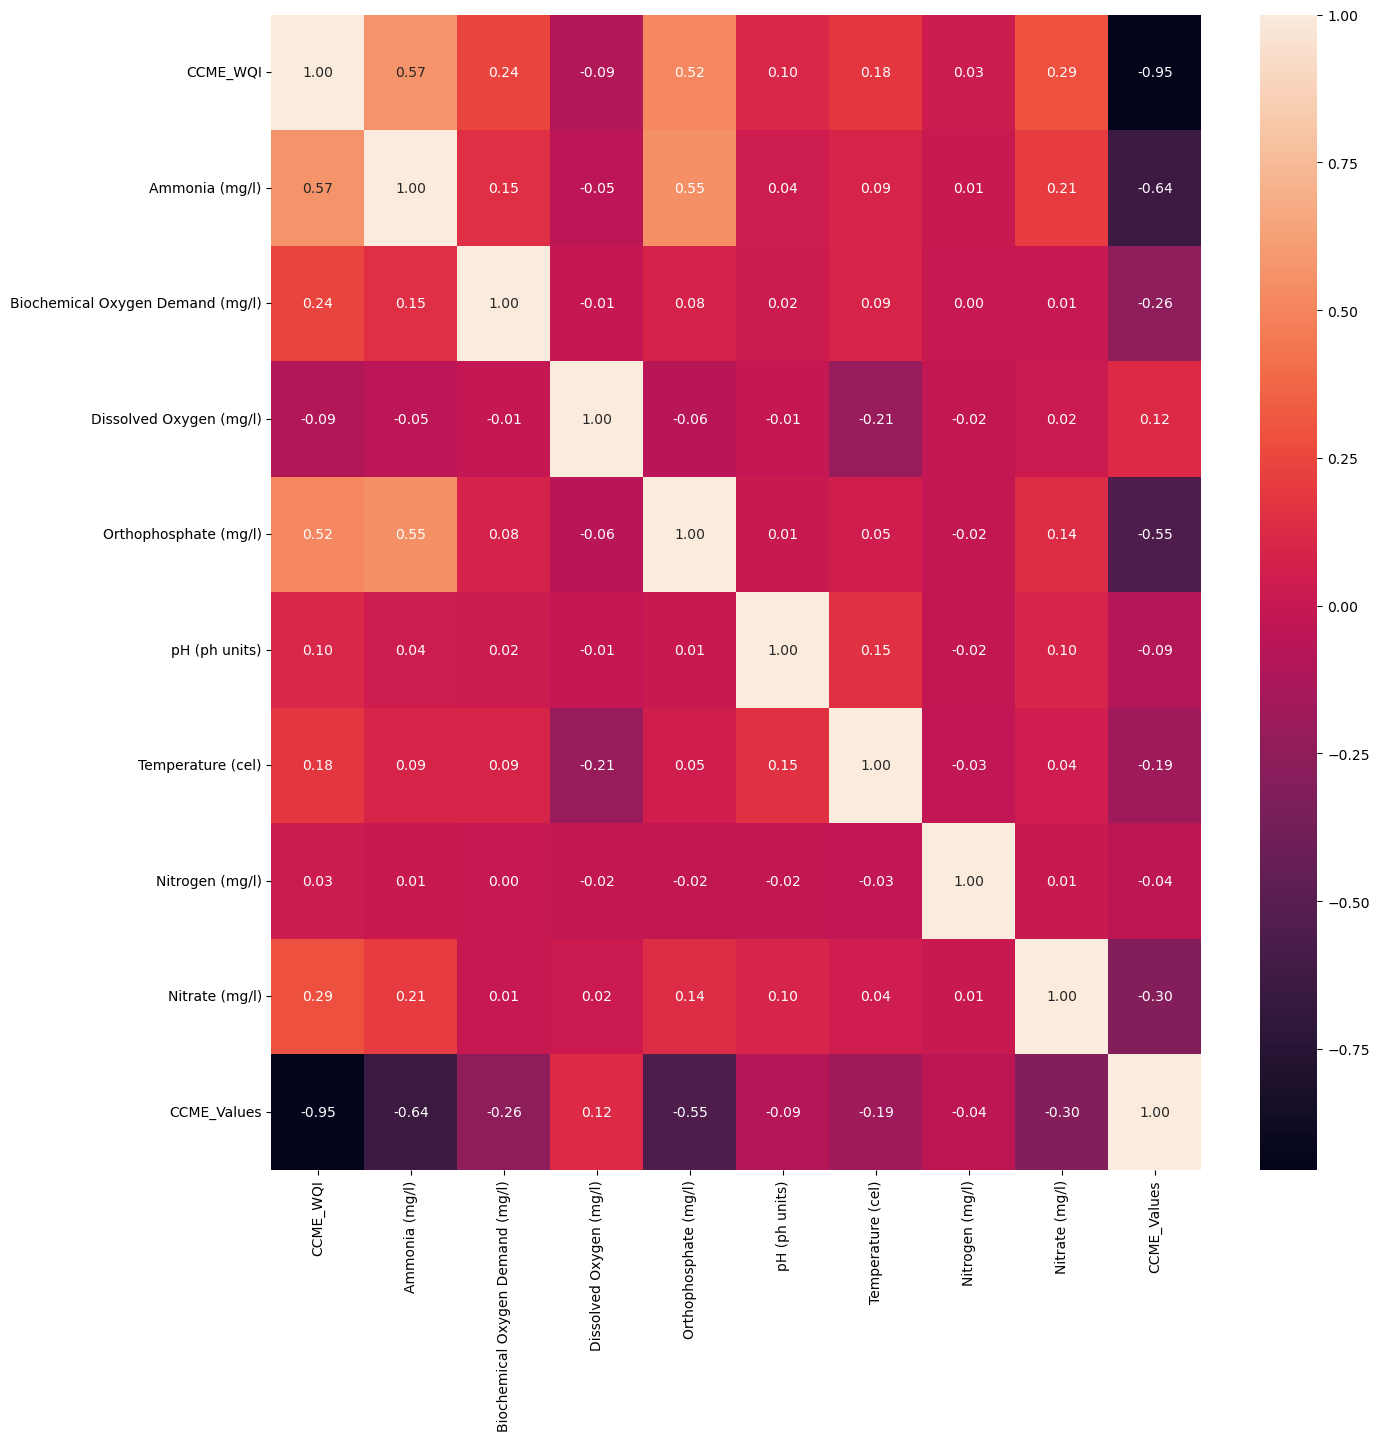

In [57]:
X_corr = X_df.corr()

fig, ax = plt.subplots(1,1,figsize = (15,15))
sns.heatmap(X_corr, annot = True, fmt = '.2f')
plt.show()